# 11주차 2강 실습

## 1. 탐색 : 데이터의 기초 정보 살펴보기
 - 기초 정보 탐색
 - 인사이트 발견 (탐색, 시각화)
 - 데이터 전처리
 - 탐색적 분석

### 1) Chipotle 데이터셋의 기본 정보

In [1]:
import pandas as pd

# file_path = 'chipotle.tsv'
# chipo = pd.read_csv('chipotle.tsv', sep = '\t')
file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
chipo.shape # 4622열, 5행

(4622, 5)

In [3]:
print(chipo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


### 2) Chipotle 데이터셋의 행과 열, 데이터

In [4]:
chipo.head(10) 
# 	order_id	quantity	 : 수치형 피처
# item_name	choice_description	item_price : 범주형 피처

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
chipo.describe() 
# describe : 전체 데이터 셋 중 수치형 데이터에 있어서 
#           기초 통계를 출력해주는 함수 

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [6]:
chipo.columns # 컬럼(행, 피처) 출력

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [7]:
chipo.index # 전체 인덱스 값의 갯수를 출력

RangeIndex(start=0, stop=4622, step=1)

### 3) Chipotle 데이터셋의 수치적 특징 파악

In [8]:
chipo['order_id'] = chipo['order_id'].astype(str) 
chipo.describe()
# order_id 행의 데이터 종류를 string으로 변경하였기 때문에 quantity행만 출력한다.

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [9]:
# 범주형 데이터 처리하기
print(len(chipo['order_id'].unique())) # 1834
print(len(chipo['item_name'].unique())) # 50

1834
50


In [10]:
chipo['order_id'].unique()

array(['1', '2', '3', ..., '1832', '1833', '1834'], dtype=object)

In [11]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

## 2. 인사이트의 발견(탐색, 시각화)

In [12]:
item_count = chipo['item_name'].value_counts()[:10]
item_count 
# 가장 많이 팔린 메뉴 10개 출력

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [13]:
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

# 가장 많이 팔린 메뉴 10개 for문 사용하여 출력

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Chips 211
Top 7 : Steak Bowl 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [14]:
# item별로 주문 갯수와 총량 출력
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [15]:
# 전체 주문 총량 출력하기
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

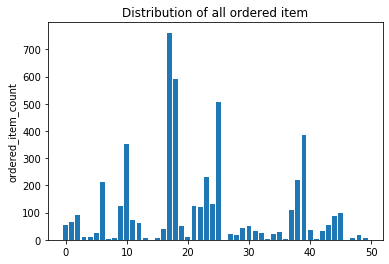

In [16]:
# 시각화하기
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
# item_quantity : 주문 총량 변수

x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

# tolist() : 리스트 파일로 사용할 수 있게 해주는 함수

plt.bar(x_pos, order_cnt, align='center') # align속성 : 
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

In [17]:
# item_quantity.index.tolist()
type(item_quantity.index.tolist()) # list

list

In [18]:
# item_quantity.values.tolist()
type(item_quantity.values.tolist()) # list

list

# 11주차 3강 실습

## 3. 데이터 전처리 : 전처리 함수 사용하기

### 1) item_price 피처 살쳐보기

In [19]:
import pandas as pd

file_path = 'data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [20]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [21]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [22]:
# chipo['item_price'] = 
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

In [23]:
a = '$16.98'[1:]
a

'16.98'

In [24]:
type(a)

str

In [25]:
float("$16.98"[1:]) # 자료형 데이터가 실수형으로 변환

16.98

In [26]:
chipo['item_price'].head()
# $가 제거되어있고 데이터는 object에서 float64로 변환되어있다.

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [27]:
chipo.describe()
# item_price행이 실수형으로 변환되어있다.

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


### 2) apply와 lambda 함수를 이용한 데이터 전처리

## 4. 탐색적 분석 : 스무고개로 개념적 탐색 분석하기

#### < 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기 >
- 주문당 평균 계산금액 출력하기
- 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기
- "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기
- "Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기

In [28]:
# 주문당 평균 계산금액 출력하기
# order_id를 기준으로 groupby를 사용한다.
chipo.groupby('order_id')['item_price'].sum().mean()

18.81142857142869

In [29]:
# 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
chipo_orderid_group = chipo.groupby('order_id').sum()

results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


In [30]:
# 각 아이템의 가격 구하기
chipo_one_item = chipo[chipo.quantity == 1]
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [31]:
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = 'item_price', ascending = False) 
# by속성 : item_price 행을 기준으로, ascending : 내림차순으로 정렬하라.

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


In [32]:
# 가장 비싼 주문에서 item이 몇개 팔렸는지 구하기


In [33]:
# "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기


In [34]:
# "Chicken Bowl"을 2개 이상 주문한 주문 횟수 구하기


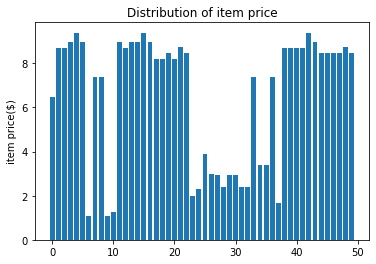

In [35]:
# 아이템 가격 그래프 출력하기
import numpy as np
import matplotlib.pyplot as plt

item_name_list = price_per_item.index.tolist()
x_pos - np.arange(len(item_name_list)) 
# item_name_list 길이를 변수 x축으로 지정

item_price = price_per_item['item_price'].tolist() 
# 전체 가격

plt.bar(x_pos, item_price, align = 'center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')

plt.show()

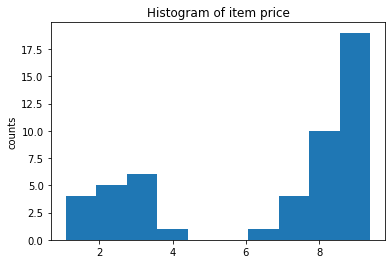

In [36]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()